This NoteBook aims to build a method to find the best features that show the
of learning in the data.

In [78]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io as spio
from sklearn import preprocessing
import pandas as pd

In [84]:
# Load the data
path_to_data = '..\\..\\..\\data\\inputs\\diffusion_map_analysis.mat'
data = spio.loadmat(path_to_data)
X = data["diffusion_map"] # X is a matrix of size (samples X features)
y = data["sflabels"] # y is a vector of binary results
train_stage = data["train_stage"] # train_stage is a vector with the sessions

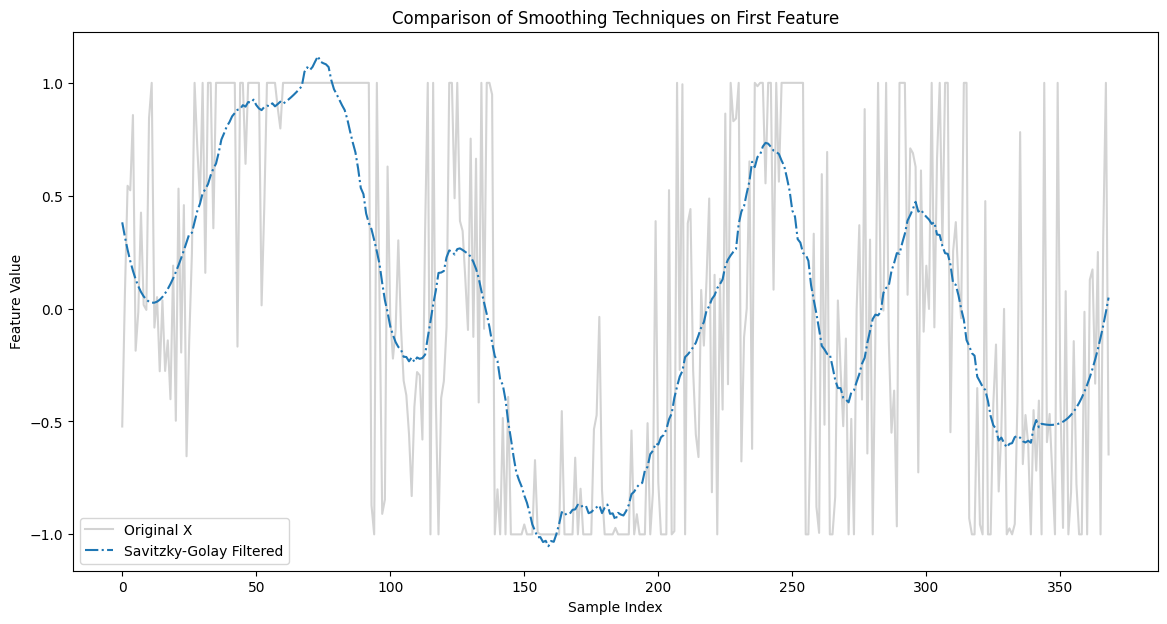

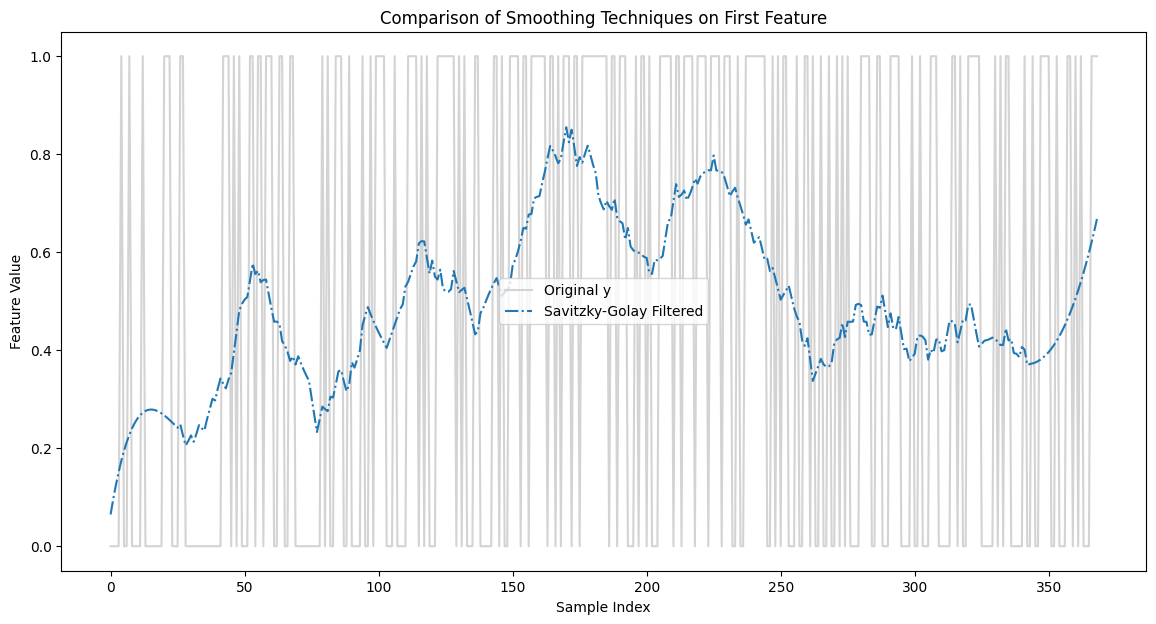

In [53]:
# Basic Preprocessing
# Normalize the data
X = preprocessing.normalize(X, norm='max')

# Smooth the data
smooth_X = signal.savgol_filter(X, window_length=51, polyorder=3, axis=0)
smooth_y = signal.savgol_filter(y, window_length=51, polyorder=3, axis=0)

# Plotting Examples
# X
plt.figure(figsize=(14,7))
plt.plot(X[:, 0], label='Original X', color='lightgray')
plt.plot(smooth_X[:, 0], label='Savitzky-Golay Filtered', linestyle='-.')
plt.legend()
plt.title('Comparison of Smoothing Techniques on First Feature')
plt.xlabel('Sample Index')
plt.ylabel('Feature Value')
plt.show()
# y
plt.figure(figsize=(14,7))
plt.plot(y[:, 0], label='Original y', color='lightgray')
plt.plot(smooth_y[:, 0], label='Savitzky-Golay Filtered', linestyle='-.')
plt.legend()
plt.title('Comparison of Smoothing Techniques on First Feature')
plt.xlabel('Sample Index')
plt.ylabel('Feature Value')
plt.show()

X = smooth_X
y = smooth_y

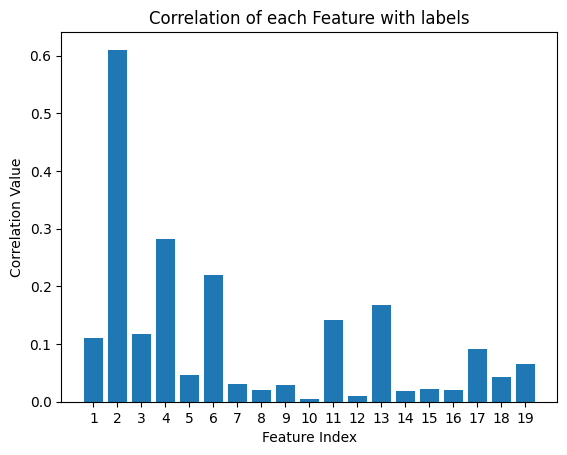

In [86]:
# Preform Basic Feature Comparison
# Assuming X and y have already been defined and appropriately normalized.

# Ensure y is correctly shaped as a column vector.
y_reshaped = y.reshape(-1, 1)

# Concatenate X and y to compute correlations.
data = np.concatenate([X, y_reshaped], axis=1)

# Compute the correlation matrix.
corr_matrix = np.corrcoef(data.T)  # Use .T to transpose for correct orientation.

# Extract correlations of features with y, avoiding the last element (y with itself).
corr_with_y = np.abs(corr_matrix[:-1, -1])


# Plotting
feature_num = np.arange(len(corr_with_y)) + 1
plt.figure()
plt.bar(feature_num, corr_with_y)
plt.title('Correlation of each Feature with labels')
plt.xlabel('Feature Index')
plt.ylabel('Correlation Value')
plt.xticks(feature_num)
plt.show()

sorted_features = np.argsort(corr_with_y)[::-1]

Unlike we might have expected, the best feature to correlate with the SF labels (which we assumes engulfs the process of learning) is the third element. We will now show the difference in the plots between using the first two elements VS. using the two most correlated features.

C:\Users\ariel\AppData\Local\Temp\ipykernel_6648\3363981801.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', np.unique(train_stage).shape[0])


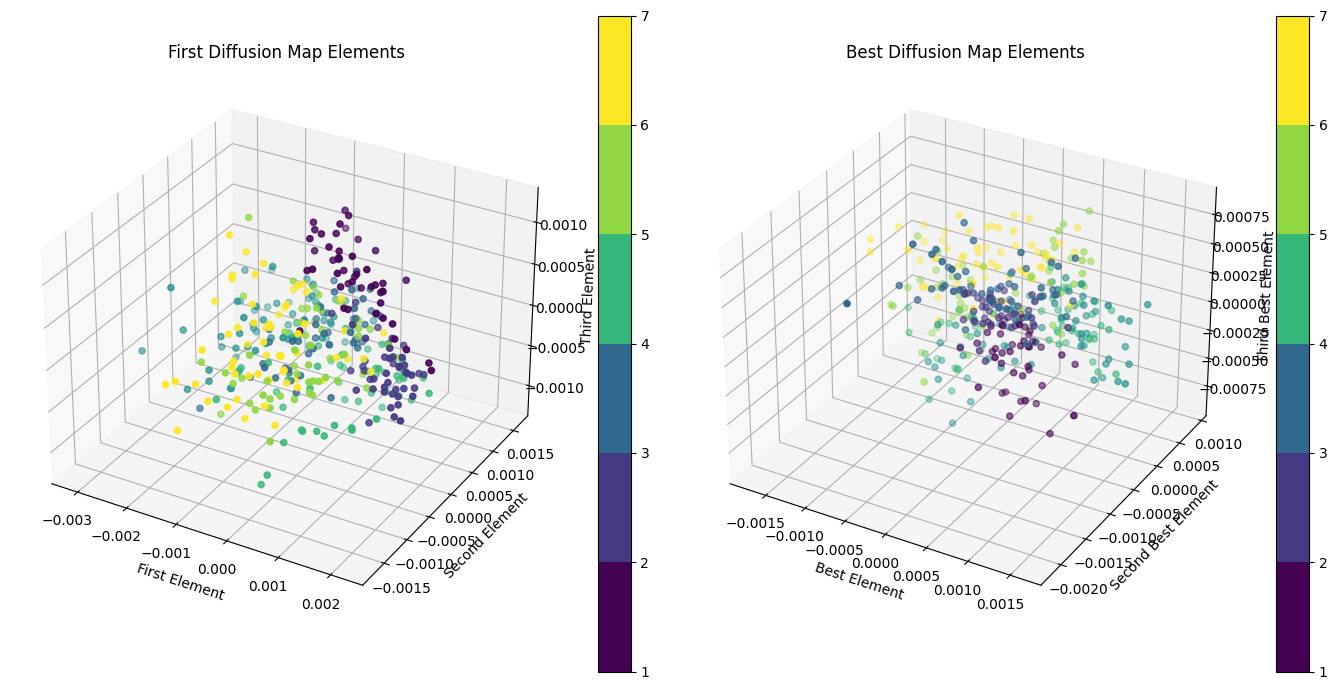

In [91]:
# Plotting the difference
first_feature = X[:, 0]
second_feature = X[:, 1]
third_feature = X[:, 2]

best_feature = X[:, sorted_features[0]]
second_best_feature = X[:, sorted_features[1]]
third_best_feature = X[:, sorted_features[2]]

# Create a color map based on train_stage
cmap = plt.cm.get_cmap('viridis', np.unique(train_stage).shape[0]) 

# Create a figure for 3D plotting
fig = plt.figure(figsize=(14, 7))

# First 3D scatter plot
ax1 = fig.add_subplot(121, projection='3d')  # 1 row, 2 columns, first subplot
scatter = ax1.scatter(first_feature, second_feature, third_feature, c=train_stage, cmap=cmap)
ax1.set_title("First Diffusion Map Elements")
ax1.set_xlabel("First Element")
ax1.set_ylabel("Second Element")
ax1.set_zlabel("Third Element")
# Adding a color bar
fig.colorbar(scatter, ax=ax1, boundaries=np.linspace(np.min(train_stage), np.max(train_stage), len(np.unique(train_stage))))

# Second 3D scatter plot
ax2 = fig.add_subplot(122, projection='3d')  # Second subplot
scatter = ax2.scatter(best_feature, second_best_feature, third_best_feature, c=train_stage, cmap=cmap)
ax2.set_title("Best Diffusion Map Elements")
ax2.set_xlabel("Best Element")
ax2.set_ylabel("Second Best Element")
ax2.set_zlabel("Third Best Element")
# Adding a color bar
fig.colorbar(scatter, ax=ax2, boundaries=np.linspace(np.min(train_stage), np.max(train_stage), len(np.unique(train_stage))))

plt.tight_layout()
plt.show()